In [2]:
##1. Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
##Read the data as a data frame

In [5]:
insur = pd.read_csv("insurance.csv")
insur.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [6]:
##Perform basic EDA which should include the followingn and print out your insights at every step.

In [7]:
##Shape of the data

In [8]:
insur.shape

(1338, 7)

In [9]:
##Data type of each attribute

In [10]:
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [11]:
##Checking the presence of missing values

In [12]:
insur.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
##5 point summary of numerical attributes

In [14]:
insur.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [15]:
##Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

In [16]:
from scipy.stats import skew

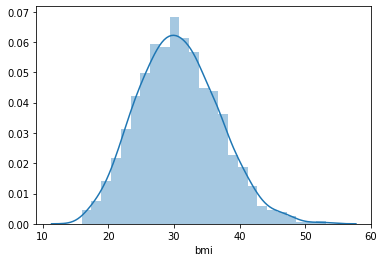

In [28]:
sns.distplot(insur['bmi']);

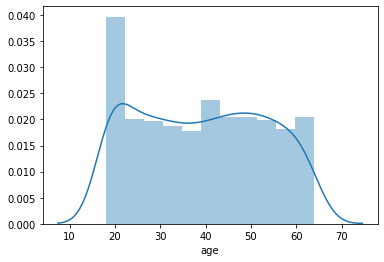

In [31]:
sns.distplot(insur['age']);

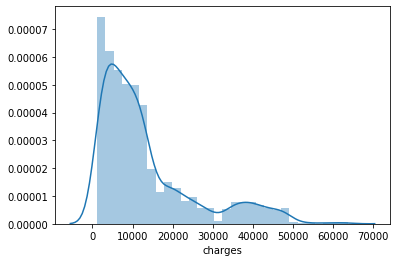

In [32]:
sns.distplot(insur['charges']);

In [17]:
##Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ Columns

In [33]:
print("Skewness of Age is \n",skew(insur.age))

Skewness of Age is 
 0.055610083072599126


In [34]:
print("Skewness of BMI is \n",skew(insur.bmi))

Skewness of BMI is 
 0.28372857291709386


In [35]:
print("Skewness of charges is \n",skew(insur.charges))

Skewness of charges is 
 1.5141797118745743


In [18]:
##Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

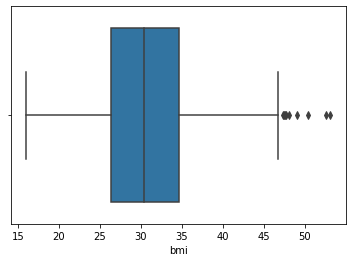

In [36]:
sns.boxplot(x=insur['bmi'])

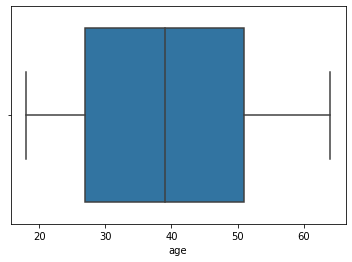

In [37]:
sns.boxplot(x=insur['age'])

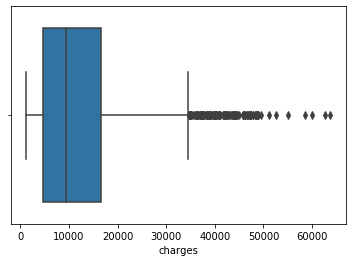

In [38]:
sns.boxplot(x=insur['charges'])

In [19]:
##Distribution of categorical columns (include children)

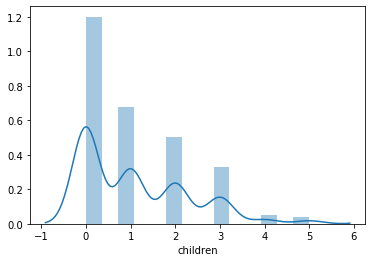

In [39]:
sns.distplot(insur['children'])
plt.show()

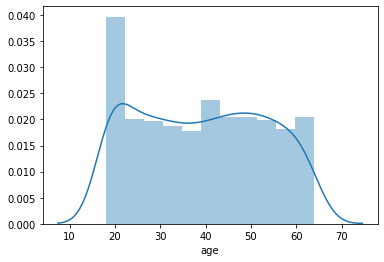

In [40]:
sns.distplot(insur['age'])
plt.show()

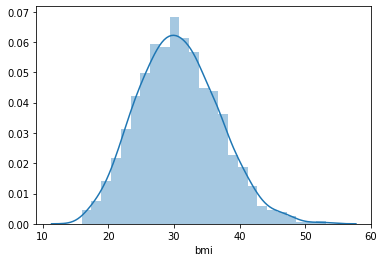

In [41]:
sns.distplot(insur['bmi'])
plt.show()

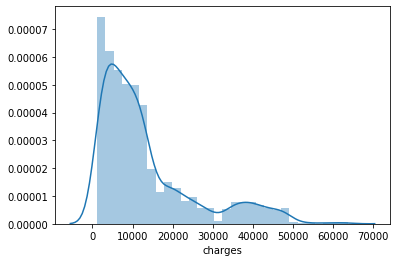

In [42]:
sns.distplot(insur['charges'])
plt.show()

In [20]:
##Pair plot that includes all the columns of the data frame

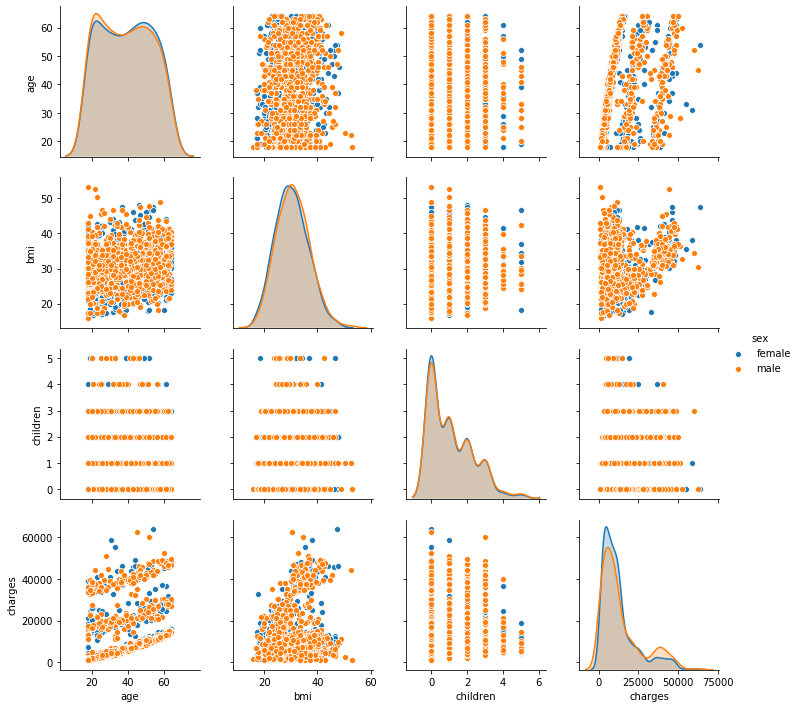

In [43]:
sns.pairplot(data=insur, hue="sex")

In [44]:
## Q: Do charges of people who smoke differ significantly from the people who don't?

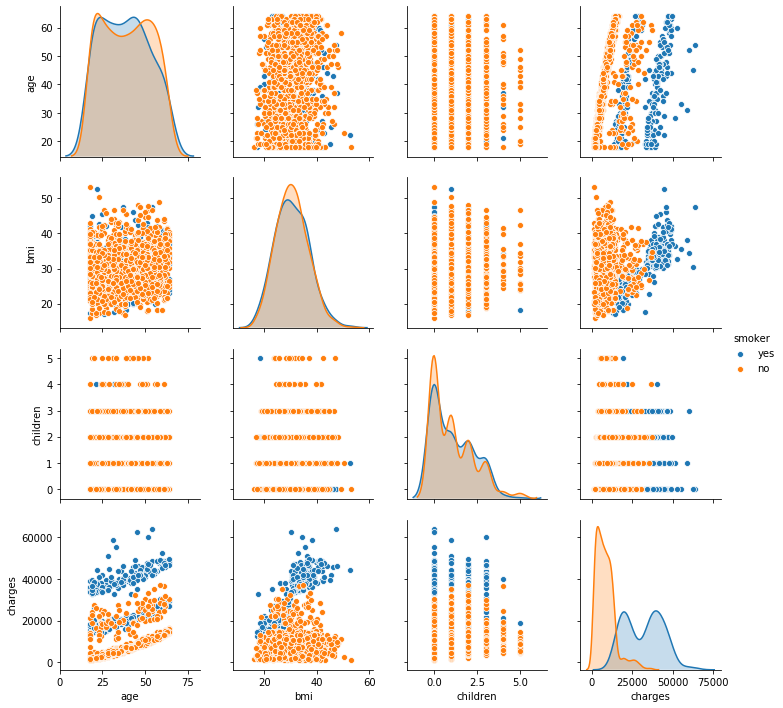

In [45]:
sns.pairplot(insur,hue='smoker')

In [46]:
## Based on above charges plot it is evident that charges of smokers are substantially higher than non smokers

In [47]:
## Q: Does bmi of males differ significantly from that of females?

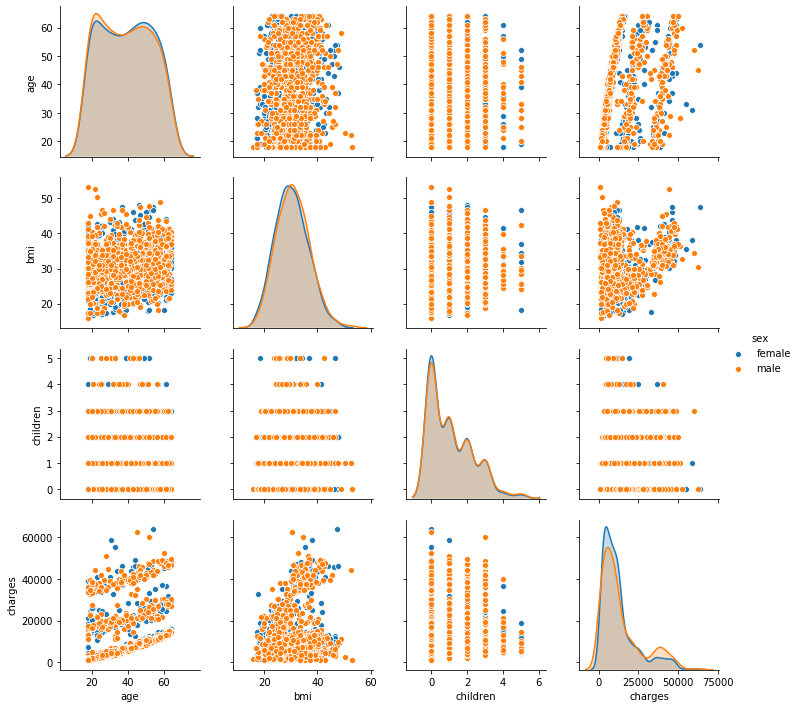

In [48]:
sns.pairplot(insur,hue='sex')

In [50]:
## It is evident from BMI plot that BMI of male and female does not have significant difference

In [51]:
## Q: Is the proportion of smokers significantly different in different genders?

In [52]:
insur.groupby(by=['smoker','sex'], as_index=False).count()

smoker     sex  age  bmi  children  region  charges
0     no  female  547  547       547     547      547
1     no    male  517  517       517     517      517
2    yes  female  115  115       115     115      115
3    yes    male  159  159       159     159      159

In [53]:
## Difference between smoker male and female is only 44, which is 16% of total smoker population. Hence, it is not significant

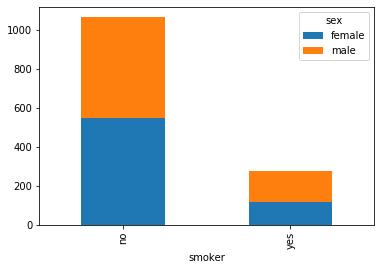

In [71]:
insur.groupby(['smoker','sex']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [75]:
## Q: Is the distribution of bmi across women with no children, one child and two children, the same ?

In [76]:
insur[insur['children'] == 0].describe()

age         bmi  children       charges
count  574.000000  574.000000     574.0    574.000000
mean    38.444251   30.550296       0.0  12365.975602
std     16.436228    6.039106       0.0  12023.293942
min     18.000000   15.960000       0.0   1121.873900
25%     22.000000   26.143750       0.0   2734.421150
50%     36.000000   30.302500       0.0   9856.951900
75%     55.000000   34.746250       0.0  14440.123825
max     64.000000   53.130000       0.0  63770.428010

In [77]:
insur[insur['children'] == 1].describe()

age         bmi  children       charges
count  324.000000  324.000000     324.0    324.000000
mean    39.453704   30.623148       1.0  12731.171832
std     12.067445    6.101435       0.0  11823.631451
min     18.000000   16.815000       1.0   1711.026800
25%     30.000000   26.615000       1.0   4791.643175
50%     40.000000   30.015000       1.0   8483.870150
75%     49.000000   34.237500       1.0  15632.052050
max     64.000000   52.580000       1.0  58571.074480

In [78]:
insur[insur['children'] == 2].describe()

age         bmi  children       charges
count  240.000000  240.000000     240.0    240.000000
mean    39.445833   30.978104       2.0  15073.563734
std     11.588715    6.509644       0.0  12891.368347
min     18.000000   16.815000       2.0   2304.002200
25%     30.000000   25.786250       2.0   6284.939438
50%     40.000000   31.640000       2.0   9264.979150
75%     48.000000   35.357500       2.0  20379.276748
max     64.000000   48.070000       2.0  49577.662400

In [79]:
## BMI of women with 0, 1 and 2 children varies. However, it does not have significant difference